In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
traindata=pd.read_csv('/kaggle/input/titanic/train.csv')
testdata=pd.read_csv('/kaggle/input/titanic/test.csv')
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:

xtrain=traindata.drop(['Cabin'],axis=1)
xtrain=xtrain.dropna()
ytrain=xtrain['Survived']
xtrain=xtrain.drop('Survived',axis=1)
xtrain['agecut']=pd.cut(xtrain['Age'],6).cat.codes
xtrain=xtrain.drop('Age',axis=1)
xtrain['Sex']=xtrain['Sex'].astype('category').cat.codes

xtrain=xtrain.drop('Name',axis=1)
xtrain=xtrain.drop('Ticket',axis=1)

xtrain['Embarked']=xtrain['Embarked'].astype('category').cat.codes


In [102]:
xvaild=xtrain[:100]
yvaild=ytrain[:100]
xtrainuse=xtrain[100:]
ytrainuse=ytrain[100:]

In [74]:
len(xtrainuse)

612

In [73]:
xtrainuse.corr()

,Pclass,SibSp,Parch,Fare
Pclass,1.000000,0.037361,0.014217,-0.549504
SibSp,0.037361,1.000000,0.376608,0.128835
Parch,0.014217,0.376608,1.000000,0.198960
Fare,-0.549504,0.128835,0.198960,1.000000


In [57]:
xtrain['agecut']

0      (13.683, 26.947]
1       (26.947, 40.21]
2      (13.683, 26.947]
3       (26.947, 40.21]
4       (26.947, 40.21]
             ...       
885     (26.947, 40.21]
886     (26.947, 40.21]
887    (13.683, 26.947]
889    (13.683, 26.947]
890     (26.947, 40.21]
Name: agecut, Length: 712, dtype: category
Categories (6, interval[float64]): [(0.34, 13.683] < (13.683, 26.947] < (26.947, 40.21] < (40.21, 53.473] < (53.473, 66.737] < (66.737, 80.0]]

In [82]:
xtrain

,Pclass,Sex,SibSp,Parch,Fare,Embarked,agecut
0,3,1,1,0,7.2500,2,1
1,1,0,1,0,71.2833,0,2
2,3,0,0,0,7.9250,2,1
3,1,0,1,0,53.1000,2,2
4,3,1,0,0,8.0500,2,2
...,...,...,...,...,...,...,...
885,3,0,0,5,29.1250,1,2
886,2,1,0,0,13.0000,2,2
887,1,0,0,0,30.0000,2,1
889,1,1,0,0,30.0000,0,1


In [103]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    int8   
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   Embarked     712 non-null    int8   
 7   agecut       712 non-null    int8   
dtypes: float64(1), int64(4), int8(3)
memory usage: 35.5 KB


In [151]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(300,input_shape=(7,),activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])

In [115]:
xtrainuse.values[:,1:]

array([[ 3.    ,  1.    ,  0.    , ...,  6.975 ,  2.    ,  3.    ],
       [ 3.    ,  1.    ,  0.    , ...,  7.8958,  0.    ,  2.    ],
       [ 3.    ,  1.    ,  0.    , ...,  7.05  ,  2.    ,  1.    ],
       ...,
       [ 1.    ,  0.    ,  0.    , ..., 30.    ,  2.    ,  1.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  0.    ,  1.    ],
       [ 3.    ,  1.    ,  0.    , ...,  7.75  ,  1.    ,  2.    ]])

In [152]:
hist=model.fit(xtrainuse.values[:,1:],ytrainuse,validation_data=(xvaild.values[:,1:],yvaild),epochs=265)

Epoch 1/265
20/20 [==============================] - 1s 12ms/step - loss: 0.2508 - accuracy: 0.5437 - val_loss: 0.2493 - val_accuracy: 0.6100
Epoch 2/265
20/20 [==============================] - 0s 4ms/step - loss: 0.1995 - accuracy: 0.6887 - val_loss: 0.2370 - val_accuracy: 0.6000
Epoch 3/265
20/20 [==============================] - 0s 4ms/step - loss: 0.1864 - accuracy: 0.7038 - val_loss: 0.2568 - val_accuracy: 0.6200
Epoch 4/265
20/20 [==============================] - 0s 4ms/step - loss: 0.1880 - accuracy: 0.7140 - val_loss: 0.2395 - val_accuracy: 0.6600
Epoch 5/265
20/20 [==============================] - 0s 4ms/step - loss: 0.1923 - accuracy: 0.7124 - val_loss: 0.2283 - val_accuracy: 0.6500
Epoch 6/265
20/20 [==============================] - 0s 4ms/step - loss: 0.1666 - accuracy: 0.7532 - val_loss: 0.2065 - val_accuracy: 0.6700
Epoch 7/265
20/20 [==============================] - 0s 4ms/step - loss: 0.1667 - accuracy: 0.7649 - val_loss: 0.2619 - val_accuracy: 0.6700
Epoch 8/265


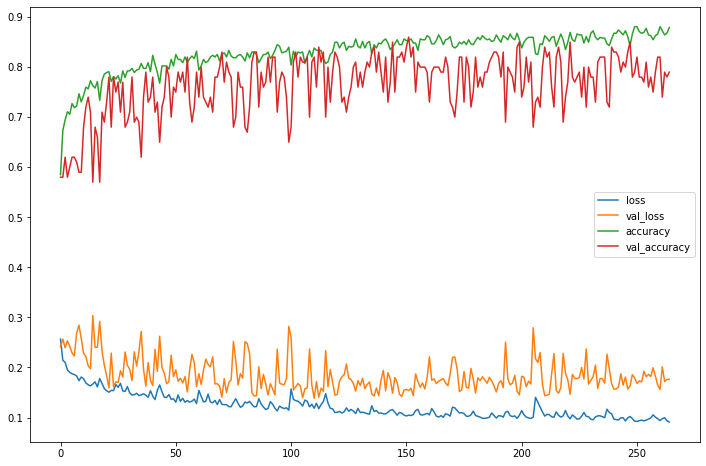

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

In [118]:

test=testdata.drop(['Cabin'],axis=1)
test=test.dropna()

test['agecut']=pd.cut(test['Age'],6).cat.codes
test=test.drop('Age',axis=1)
test['Sex']=test['Sex'].astype('category').cat.codes

test=test.drop('Name',axis=1)
test=test.drop('Ticket',axis=1)

test['Embarked']=test['Embarked'].astype('category').cat.codes

In [148]:
test[8:]

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,agecut
8,900,3,0,0,0,7.2292,0,1
9,901,3,1,2,0,24.1500,2,1
11,903,1,1,0,0,26.0000,2,3
12,904,1,0,1,0,82.2667,2,1
13,905,2,1,1,0,26.0000,2,4
...,...,...,...,...,...,...,...,...
409,1301,3,0,1,1,13.7750,2,0
411,1303,1,0,1,0,90.0000,1,2
412,1304,3,0,0,0,7.7750,2,2
414,1306,1,0,0,0,108.9000,0,3


In [120]:
res=model.predict(test.values[:,1:])

In [169]:
#res['PassengerId']=test['PassengerId']




In [180]:
resdata=pd.DataFrame(res)
resdata['PassengerId']=test['PassengerId']
resdata=pd.DataFrame(resdata)

resdata.columns=['Survived','PassengerId']
resdata=resdata[['PassengerId','Survived']]
resdata['sur1']=pd.cut(resdata['Survived'],[0,0.5,1.0]).cat.codes
resdata=resdata.drop('Survived',axis=1)
resdata.columns=['PassengerId','Survived']

In [181]:
resdata

,PassengerId,Survived
0,892.0,0
1,893.0,0
2,894.0,0
3,895.0,0
4,896.0,0
...,...,...
326,1218.0,1
327,1219.0,1
328,1220.0,0
329,1221.0,1


In [182]:
resdata.to_csv('mytitanic.csv',index=False)